In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
lap_times_df = pd.DataFrame(data=pd.read_csv('data/lap_times.csv'))

In [5]:
lap_times_df.tail()

,raceId,driverId,lap,position,time,milliseconds
538116,1096,822,53,16,1:32.998,92998
538117,1096,822,54,16,1:32.995,92995
538118,1096,822,55,16,1:31.236,91236
538119,1096,822,56,15,1:30.566,90566
538120,1096,822,57,15,1:30.743,90743


In [6]:
mexico_lap_times_df = lap_times_df.loc[lap_times_df['raceId'] == 1094]

In [7]:
drivers = mexico_lap_times_df['driverId'].unique()

In [26]:
print(drivers)
#for driver in drivers:
#    if (driver == '830' and mexico_lap_times_df['lap'] == '57'):
#        print('here ', mexico_lap_times_df['position'])

#def get_lap_times(driver):
#    driver_lap_times = mexico_lap_times_df['driverId']
#    return driver_lap_times

driver_0_lap_times = mexico_lap_times_df.loc[mexico_lap_times_df['driverId'] == 830, 'time'] 

print(driver_0_lap_times.array)
print(driver_0_lap_times.tolist)

[830   1 815 847 832 844   4 822 839 846 852 855 817  20 840 842 854 825
 848 849]
<PandasArray>
['1:25.253', '1:23.247', '1:23.079', '1:23.566', '1:23.226', '1:23.294',
 '1:23.115', '1:23.292', '1:23.246', '1:23.257', '1:23.164', '1:23.076',
 '1:23.109', '1:23.056', '1:22.971', '1:23.076', '1:23.161', '1:23.288',
 '1:23.432', '1:23.674', '1:23.295', '1:23.597', '1:23.655', '1:23.861',
 '1:26.845', '1:41.339', '1:22.494', '1:22.540', '1:22.472', '1:22.289',
 '1:22.365', '1:22.166', '1:22.316', '1:22.188', '1:22.054', '1:22.046',
 '1:22.329', '1:22.685', '1:22.382', '1:22.466', '1:22.436', '1:22.465',
 '1:22.405', '1:22.285', '1:22.426', '1:22.568', '1:22.468', '1:22.733',
 '1:22.544', '1:22.576', '1:22.308', '1:22.497', '1:22.502', '1:22.515',
 '1:22.786', '1:22.105', '1:22.425', '1:22.313', '1:22.428', '1:22.698',
 '1:22.400', '1:22.510', '1:22.720', '1:22.476', '1:29.023', '1:32.908',
 '1:22.302', '1:22.549', '1:22.794', '1:22.681', '1:22.917']
Length: 71, dtype: object
<bound method

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> None

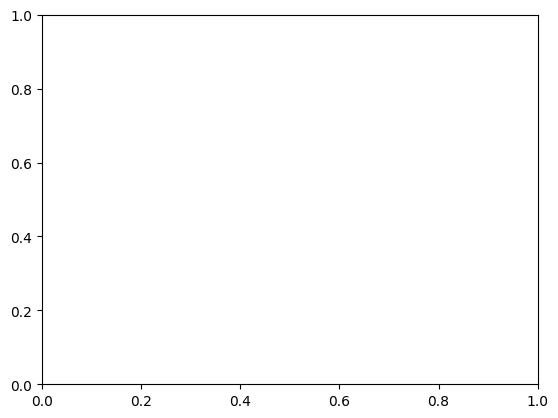

In [30]:


my_list = driver_0_lap_times.tolist()
my_dict = {'ABC': my_list}



fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())



In [36]:

# Use pandas.to_datetime() to convert string to "yyyymmdd" format
# df["InsertedDate"] = pd.to_datetime(df["InsertedDate"], format='%y%m%d')

my_list = driver_0_lap_times.tolist()
print(my_list)

list_2 = ['2', 3, 4, 5, 6, 6, 7]

print(list_2)

['1:25.253', '1:23.247', '1:23.079', '1:23.566', '1:23.226', '1:23.294', '1:23.115', '1:23.292', '1:23.246', '1:23.257', '1:23.164', '1:23.076', '1:23.109', '1:23.056', '1:22.971', '1:23.076', '1:23.161', '1:23.288', '1:23.432', '1:23.674', '1:23.295', '1:23.597', '1:23.655', '1:23.861', '1:26.845', '1:41.339', '1:22.494', '1:22.540', '1:22.472', '1:22.289', '1:22.365', '1:22.166', '1:22.316', '1:22.188', '1:22.054', '1:22.046', '1:22.329', '1:22.685', '1:22.382', '1:22.466', '1:22.436', '1:22.465', '1:22.405', '1:22.285', '1:22.426', '1:22.568', '1:22.468', '1:22.733', '1:22.544', '1:22.576', '1:22.308', '1:22.497', '1:22.502', '1:22.515', '1:22.786', '1:22.105', '1:22.425', '1:22.313', '1:22.428', '1:22.698', '1:22.400', '1:22.510', '1:22.720', '1:22.476', '1:29.023', '1:32.908', '1:22.302', '1:22.549', '1:22.794', '1:22.681', '1:22.917']
['2', 3, 4, 5, 6, 6, 7]
